###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot
np.random.seed(1337)
random.seed(1337)

In [2]:
# loss function
def loss(targets,outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss


#### Value

number of Value objects created =  1
Value(name=hello1,type=v,data=4.5, grad=0)
Value(name=hello1,type=v,data=4.5, grad=0)


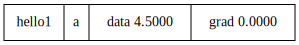

In [3]:
Value.static_var=0
a=Value(4.5,label='a',name='hello')
print("number of Value objects created = ",Value.static_var)
print(a)
draw_dot(a)

#### Neuron

number of inputs:  1
Neuron:  ReLUNeuron(1)
weights:  [Value(name=new1,type=n,data=0.23550571390294128, grad=0)]
b:  Value(name=new2,type=v,data=0, grad=0)
b label:  b
number of parameters  2
[Value(name=new1,type=n,data=0.23550571390294128, grad=0), Value(name=new2,type=v,data=0, grad=0)]
inputs  [8]
targets  [9]
number of Value objects created =  6
activation:  Value(name=new6,type=v,data=1.8840457112235303, grad=0)
Value(name=new3,type=v,data=8, grad=0.23550571390294128)
Value(name=new2,type=v,data=0, grad=1)
Value(name=new1,type=n,data=0.23550571390294128, grad=8)
Value(name=new5,type=v,data=1.8840457112235303, grad=1)
Value(name=new6,type=v,data=1.8840457112235303, grad=1)
Value(name=new4,type=v,data=1.8840457112235303, grad=1)


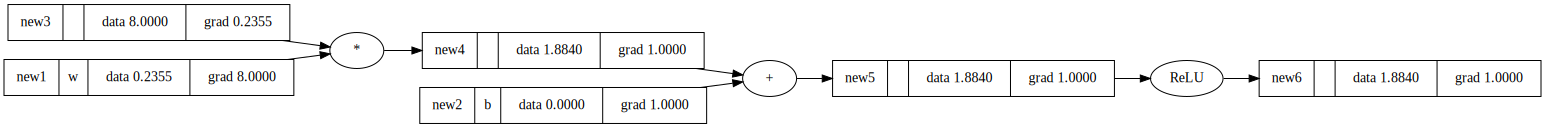

In [4]:
nin=1  #number of inputs
nout=1  #number of outputs

Value.static_var=0

myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b label: ",myNeuron.b.label)
print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())

# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
xtarget= np.random.randint(1,10, size=(nout))   # targets
print("targets ", xtarget)


#loss_Neuron=loss(myNeuron(xi),xtarget)
loss_Neuron=myNeuron(xi)
print("number of Value objects created = ",Value.static_var)

print("activation: ",loss_Neuron)
loss_Neuron.backward()
draw_dot(loss_Neuron)

#### Layer

Layer:  Layer of [ReLUNeuron(4), ReLUNeuron(4)]
Neurons:  [ReLUNeuron(4), ReLUNeuron(4)]
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
inputs  [8 8 3 3]
number of Value objects created =  36
activation:  [Value(name=new23,type=v,data=0, grad=0), Value(name=new36,type=v,data=7.5972928972211236, grad=0)]
Value(name=new31,type=v,data=1.7376769494941244, grad=0)
Value(name=new28,type=v,data=-1.8607230621726618, grad=0)
Value(name=new33,type=v,data=3, grad=0)
Value(name=new8,type=n,data=0.5792256498313748, grad=0)
Value(name=new34,type=v,data=2.530359059377558, grad=0)
Value(name=new27,type=v,data=8, grad=0)
Value(name=new26,type=v,data=5.189979950522103, grad=0)
Value(name=new7,type=n,data=-0.23259038277158273, grad=0)
Value(name=new30,type=v,data=3, grad=0)
Value(name=new25,type=v,data=5.189979950522103, grad=0)
Value(name=new6,type=n,data=0.6487474938152629, grad=0)
Value(name=new35,type=v,data=7.5972928972211236, grad=0)
Value(name=new9,type=n,data=0.8434530197925192, grad=0)
Value(name

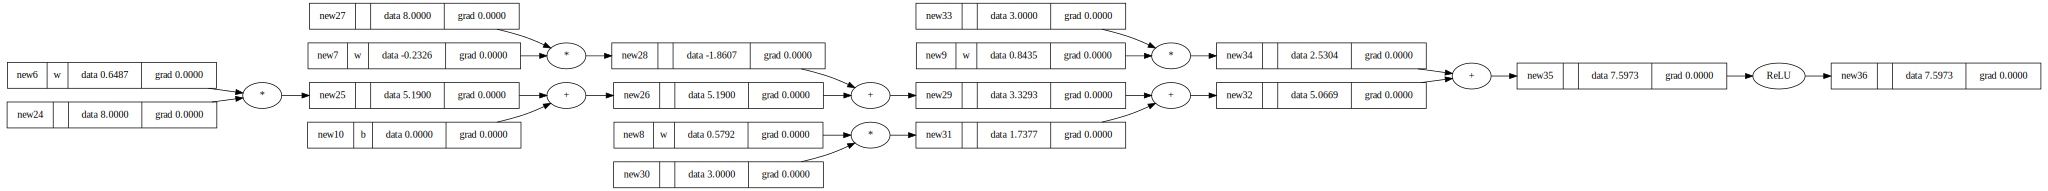

In [5]:
nin=4  #number of inputs
nout=2  #number of outputs

Value.static_var=0

myLayer=Layer(nin,nout)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)

for neuron in myLayer.neurons:
    print("Neuron: ",neuron)
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
loss_myLayer=myLayer(xi)
print("number of Value objects created = ",Value.static_var)

print("activation: ",loss_myLayer)
draw_dot(loss_myLayer[1])


#### Multi Layer Perceptron

MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41
inputs  [7 8 9]
number of Value objects created =  394
Value(name=new362,type=v,data=0.5804388732997792, grad=0)
Value(name=new363,type=v,data=-0.0, grad=0)
Value(name=new72,type=v,data=2.0, grad=0)
Value(name=new73,type=v,data=0.44317297141528034, grad=0)
Value(name=new364,type=v,data=0.5804388732997792, grad=0)
Value(name=new74,type=v,data=0.44317297141528034, grad=0)
Value(name=new365,type=v,data=0.0, grad=0)
Value(name=new75,type=v,data=3.0, grad=0)
Value(name=new76,type=v,data=-0.4069877309154468, grad=0)
Value(name=new366,type=v,data=0.5804388732997792, grad=0)
Value(name=new77,type=v,data=0.036185240499833515, grad=0)
Value(name=new367,type=v,data=0.0, grad=0)
Value(name=new78,type=v,data=-1.0, grad=0)
Value(name=new79,type=v,data=-0.5808552090645627, grad=0)
Value(name=new368,typ

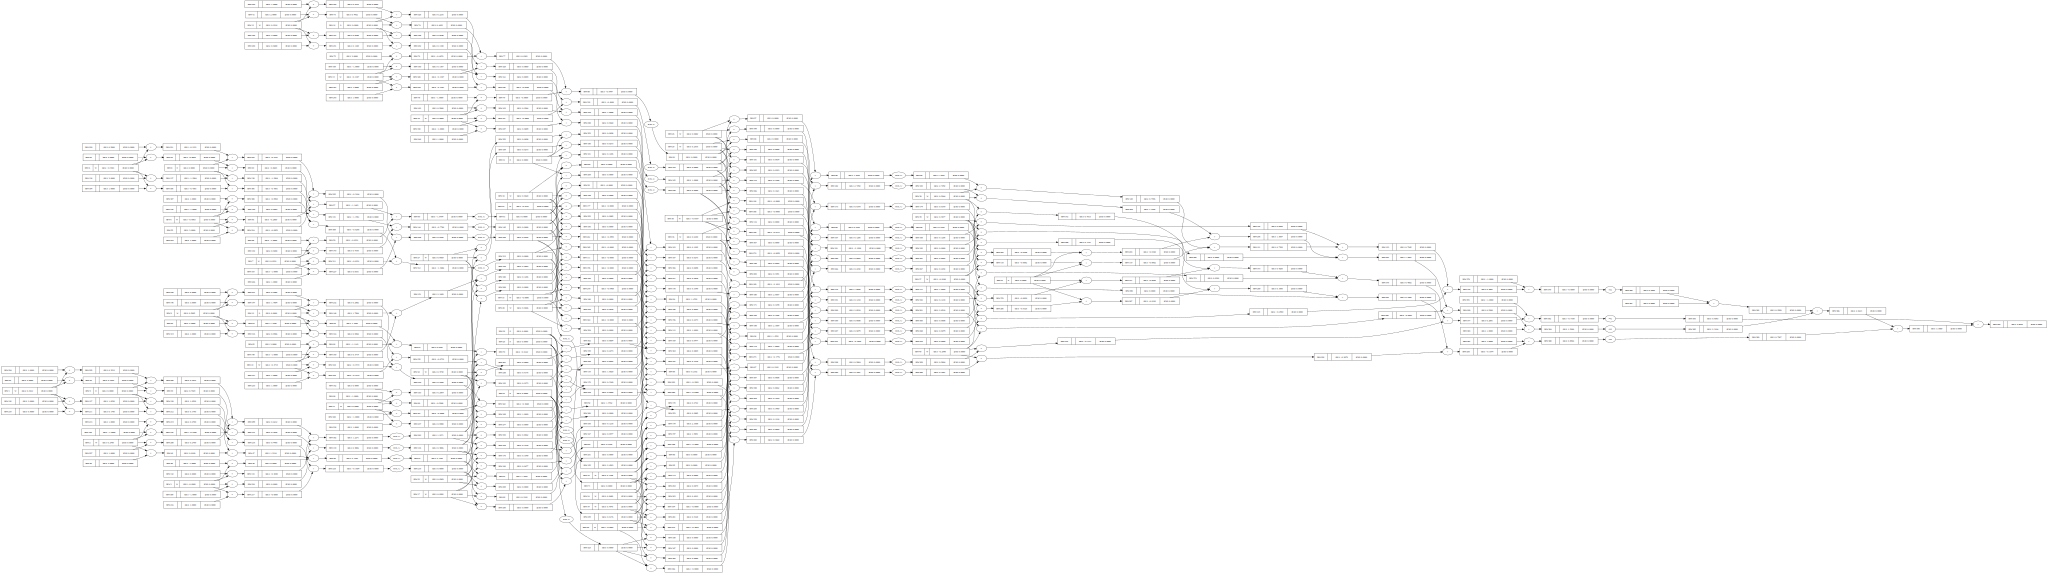

In [9]:
# initialize a model 
nin=3  #number of inputs
Value.static_var=0

model = MLP(nin, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)


#ys = [1.0]  # desired targets
#ypred = [model(x) for x in xi]
#loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))


xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]  # desired targets
ypred = [model(x) for x in xs]
loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))



#loss_model=myNeuron(xi)


print("number of Value objects created = ",Value.static_var)

#print("activation: ",loss_model)
#draw_dot(loss)


## Gradient

In [7]:
Value.static_var=0

myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("number of Value objects created = ",Value.static_var)

print("loss=",loss)

#draw_dot(loss)
loss.backward()

[Value(name=new1,type=n,data=0.30584552737905213, grad=0), Value(name=new2,type=v,data=0, grad=0)]
weights:  [Value(name=new1,type=n,data=0.30584552737905213, grad=0)]
[Value(name=new3,type=n,data=0.23949109098065002, grad=0), Value(name=new4,type=v,data=0, grad=0)]
number of Value objects created =  11
loss= Value(name=new11,type=v,data=0.07324727902356146, grad=0)


Value(name=new1,type=n,data=0.30584552737905213, grad=0.23949109098065002)
Value(name=new8,type=v,data=1.0, grad=0.07324727902356146)
Value(name=new10,type=v,data=0.23949109098065002, grad=0.30584552737905213)
Value(name=new2,type=v,data=0, grad=0.23949109098065002)
Value(name=new3,type=n,data=0.23949109098065002, grad=0.30584552737905213)
Value(name=new4,type=v,data=0, grad=0.30584552737905213)
Value(name=new11,type=v,data=0.07324727902356146, grad=1)
Value(name=new6,type=v,data=0.30584552737905213, grad=0.23949109098065002)
Value(name=new9,type=v,data=0.23949109098065002, grad=0.30584552737905213)
Value(name=new5,type=v,data=1.0, grad=0.07324727902356146)
Value(name=new7,type=v,data=0.30584552737905213, grad=0.23949109098065002)


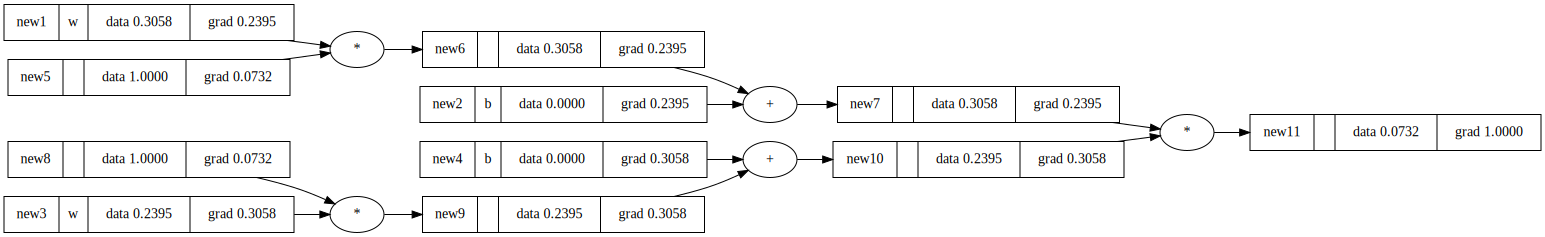

In [8]:
draw_dot(loss)